# Generating random numbers

In this section, we cover generation of random numbers using Julia. The main package to
use it the [Random.jl](https://docs.julialang.org/en/v1/stdlib/Random/).

## Uniform random number generator

### Custom algorithm

A simple example of how to generate uniform random numbers are using a linear
congruential generator (LCG). For example
$$ s_i = as_{i-1}\mod m, ~\text{and}~ u_i = s_i / m. $$

In [1]:
using CairoMakie
using Random

function myrand(n, seed)
    a = 65_539
    x = zeros(n)
    x[1] = (a * seed) % 2^31
    for i = 2:n
        x[i] = (a * x[i-1]) % 2^31
    end
    x / 2^31
end
x = myrand(1000, 100)

1000-element Vector{Float64}:
 0.0030518975108861923
 0.018310965970158577
 0.08239871822297573
 0.3295936156064272
 0.23597322963178158
 0.44949683733284473
 0.5732219573110342
 0.3938602078706026
 0.20416363142430782
 0.6802399177104235
 ⋮
 0.3431957233697176
 0.7045139279216528
 0.13832205720245838
 0.48930699191987514
 0.6909434366971254
 0.7418976929038763
 0.23289522714912891
 0.7202921267598867
 0.22569571621716022

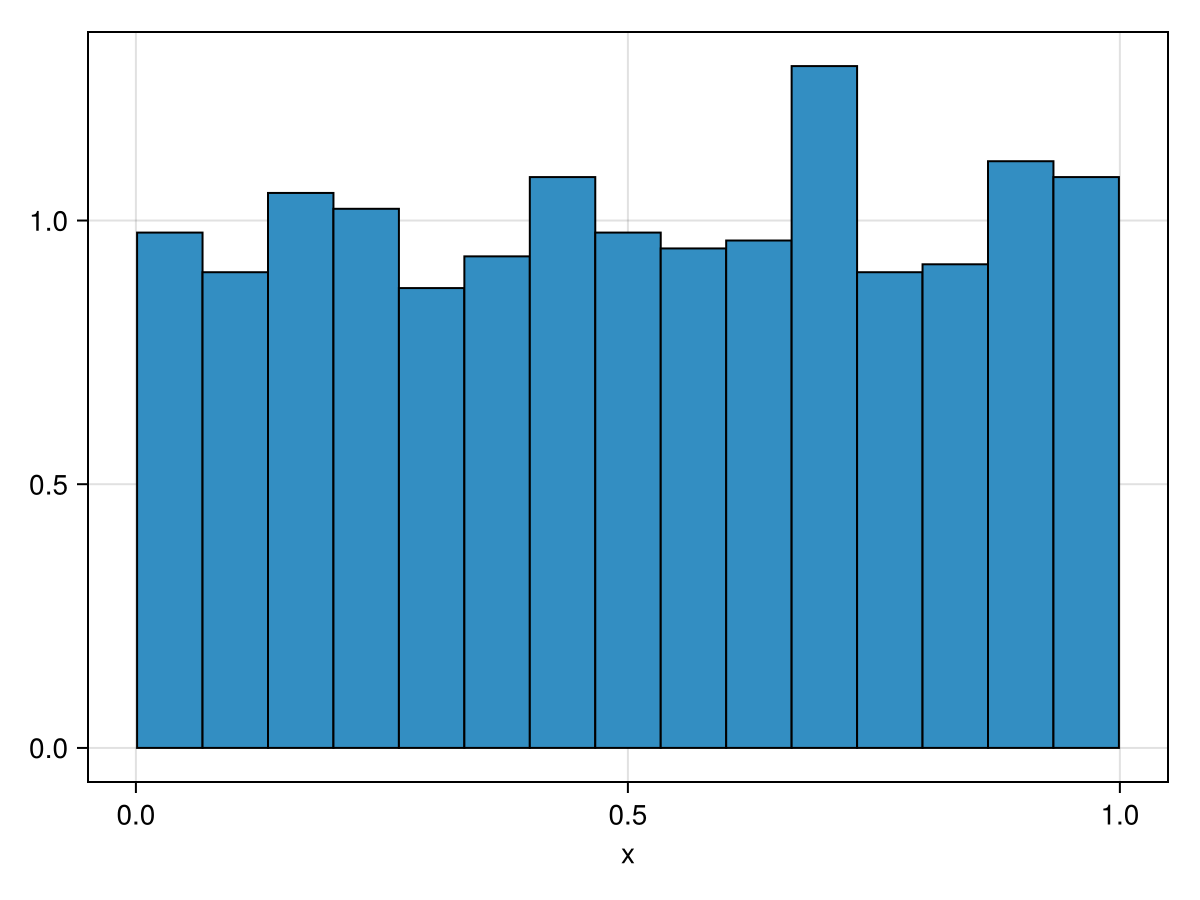

In [2]:
function myhist(x)
    hist(x, strokewidth = 1, normalization = :pdf,
    axis = (xlabel = "x",)
    )
end
fig = myhist(x)

### Default Julia function

The basic function to generate random numbers is `rand`.

In [3]:
rand()

0.2433562651786383

In [4]:
rand(10)

10-element Vector{Float64}:
 0.11387059544693845
 0.43045727817819124
 0.4491661128053267
 0.05235384172929114
 0.9342061286699229
 0.30579597035899464
 0.019090579884116
 0.6059307697742153
 0.21136344409705277
 0.6956234803586998

In [5]:
rand(2, 3)

2×3 Matrix{Float64}:
 0.131999  0.279098  0.969063
 0.662639  0.476854  0.126029

#### Defining the RNG

We can provide the desired 'RNG'.

In [6]:
rand(TaskLocalRNG())

0.9007301683540254

In [7]:
rand(RandomDevice())

0.38319750909914263

In [8]:
rand(MersenneTwister(11))

0.3389033221483959

In [9]:
rand(Xoshiro(11))

0.5805097055341872

#### Defining an space

We can define the space from where to generate random numbers.

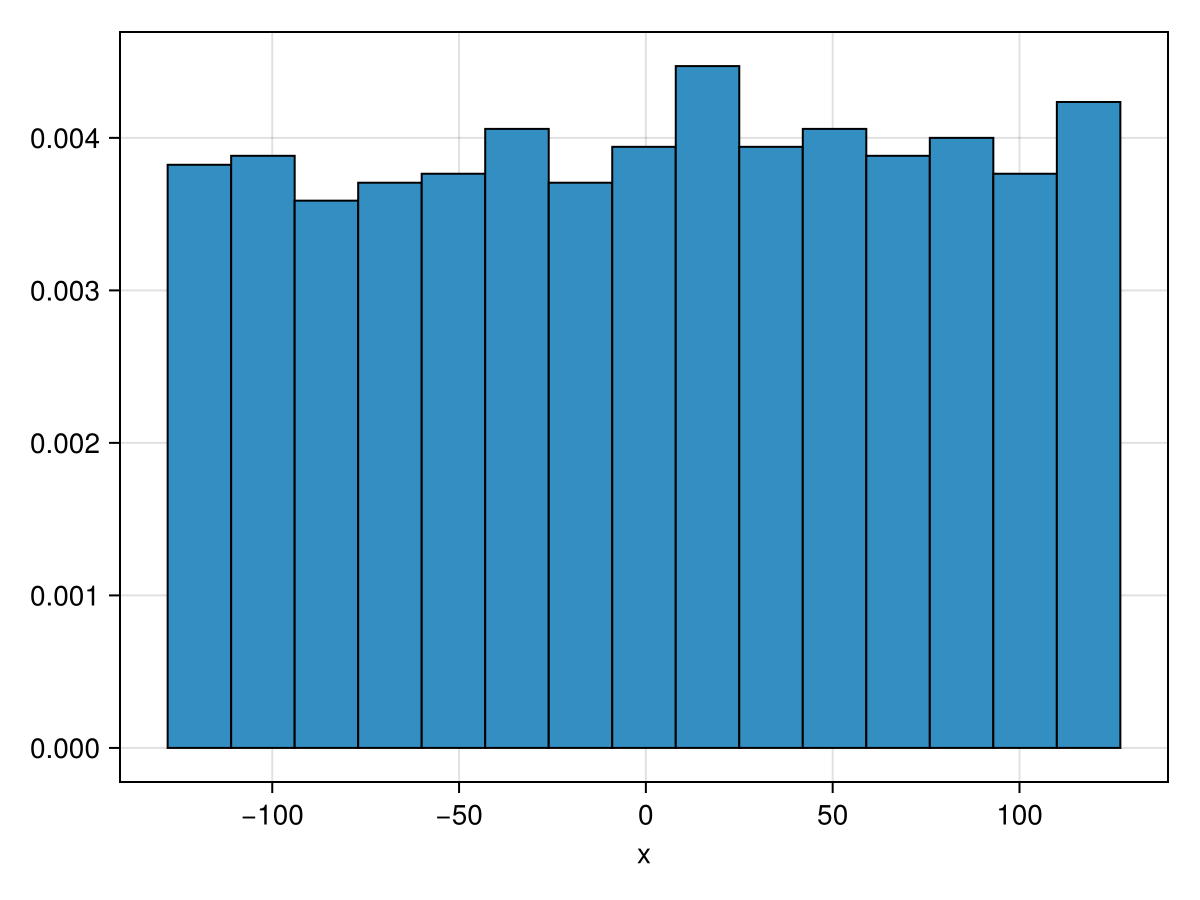

In [10]:
fig = rand(Int8, 1000) |> myhist

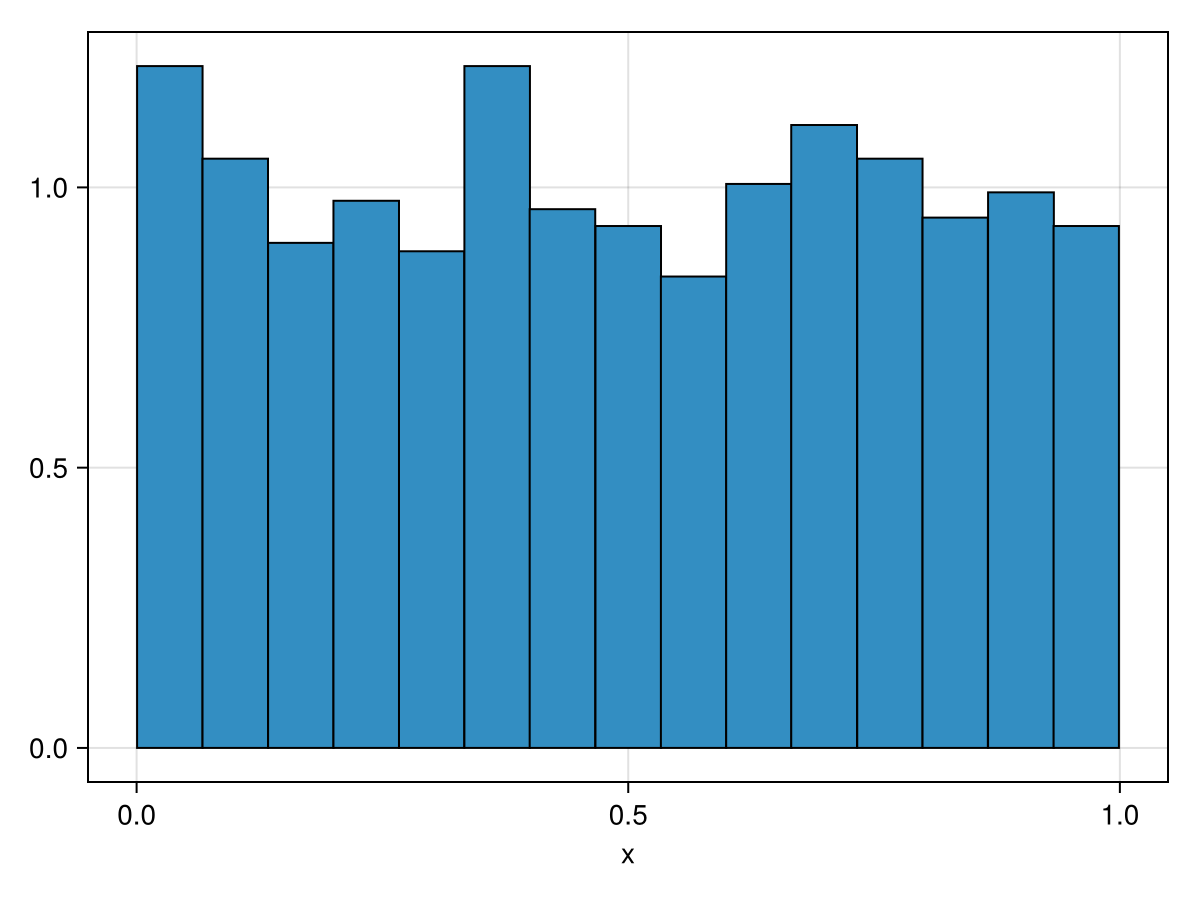

In [11]:
fig = rand(Float16, 1000) |> myhist

In [12]:
rand([1, 4, 9], 10)

10-element Vector{Int64}:
 1
 9
 4
 4
 4
 9
 4
 4
 1
 4

In [13]:
rand((1, 4, 9), 10)

10-element Vector{Int64}:
 1
 9
 1
 4
 4
 4
 1
 4
 4
 4

In [14]:
rand(("x", "y", "z"), 10)

10-element Vector{String}:
 "z"
 "z"
 "x"
 "y"
 "z"
 "z"
 "y"
 "x"
 "y"
 "x"

In [15]:
rand(Dict("a" => 1, "b" => 2), 3)

3-element Vector{Pair{String, Int64}}:
 "b" => 2
 "a" => 1
 "a" => 1

It is easy to define an array of random numbers

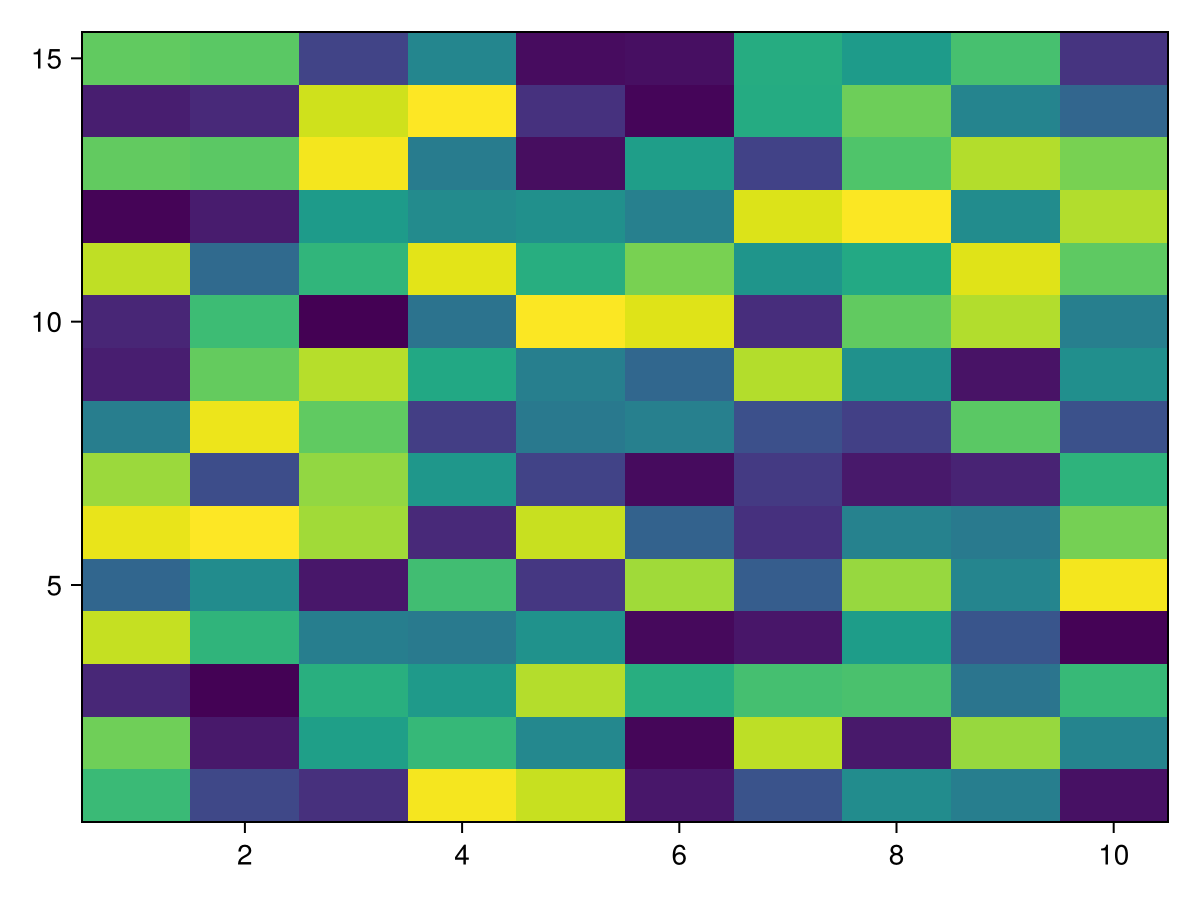

In [16]:
fig = rand(Float16, (10,15)) |> heatmap

#### Set a seed

The seed can be used with the function `seed!` from the `Random` package.

In [17]:
using Random
Random.seed!(1234)
rand(10)

10-element Vector{Float64}:
 0.5798621201341324
 0.4112941179498505
 0.9721360824554687
 0.014908849285099945
 0.520354993723718
 0.6395615996802734
 0.8396219340580711
 0.967142768915383
 0.13102565622085904
 0.9464532262313834

### Populate a matrix with random numbers

In [18]:
A = zeros(4,5)
rand!(A)

4×5 Matrix{Float64}:
 0.749719   0.840641   0.916813  0.347995   0.728543
 0.552534   0.523948   0.530477  0.528694   0.00277646
 0.0834401  0.0128461  0.914641  0.95833    0.134685
 0.525796   0.40573    0.333563  0.0214408  0.531899

## Non-Uniform random number generator

### Inverse CDF method

Let $X$ be a continuous random variable with cumulative distribution function
$F_X(x)$. Then
\begin{align*}
  F_X(X) & = U, ~\text{where}~ U \sim \text{Uniform}(0,1) \\
  X & = F_X^{-1}(U) \\
  x_i & = F_X^{-1}(u_i).
\end{align*}

In [19]:
using CairoMakie
using Distributions

function myhist(x; title = "")
    hist(x, strokewidth = 1, normalization = :pdf,
    axis = (xlabel = "x", title = title)
    )
end

myhist (generic function with 1 method)

### Exponential

\begin{align*}
  F_{X}(X) & = 1 -\exp\left(-\frac{X}{\theta}\right) = U \\
  X & = -\theta\ln(1 - U) = F_X^{-1}(U) \\
  x_i & = -\theta\ln(1 - u_i).
\end{align*}

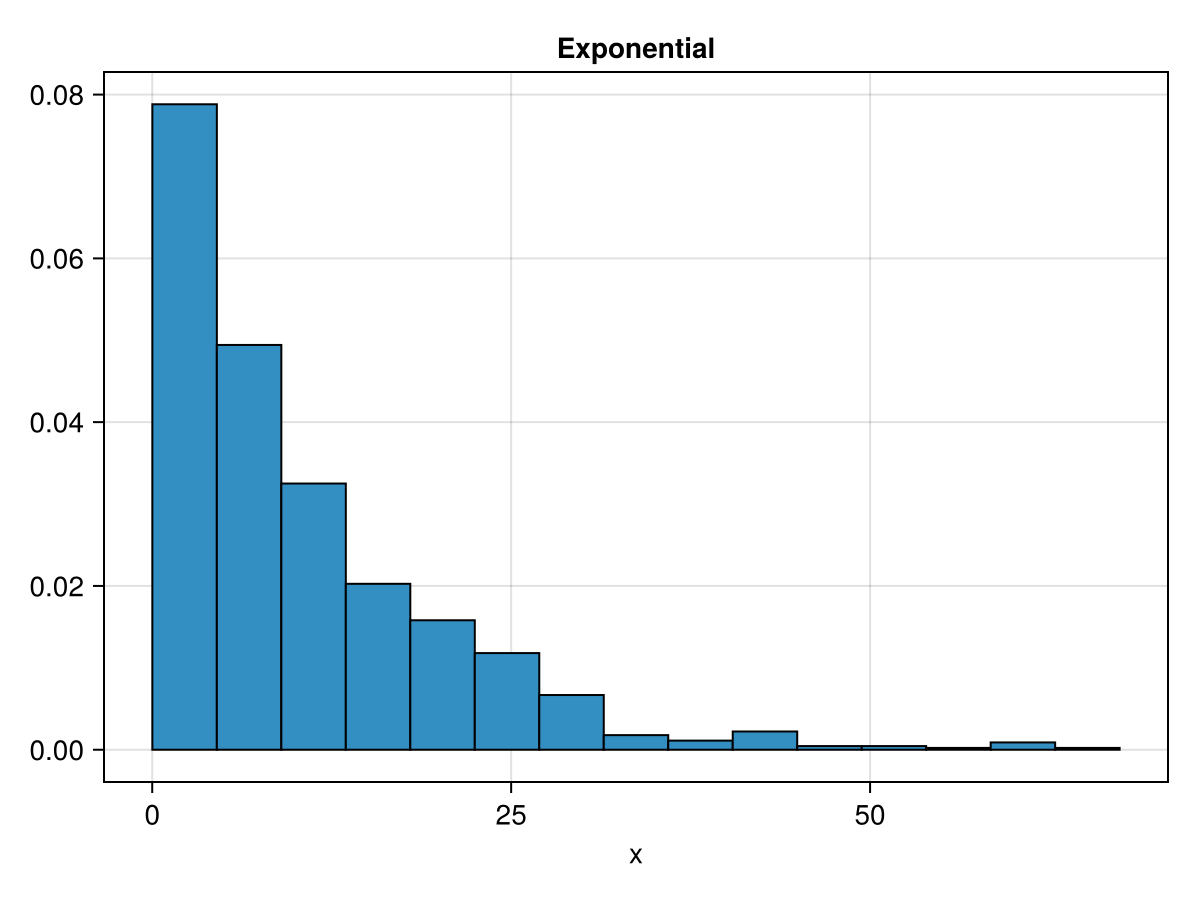

In [20]:
n = 1000
θ = 10
u = rand(n)
x = -θ * log.(1 .- u)
fig = myhist(x, title = "Exponential")

### Pareto

\begin{align*}
  F_{X}(X) & = 1 -\left(\frac{\lambda}{X}\right)^k = U \\
  X & = \frac{\lambda}{(1-U)^{1/k}}= F_X^{-1}(U) \\
  x_i & = \frac{\lambda}{(1-u_i)^{1/k}}.
\end{align*}

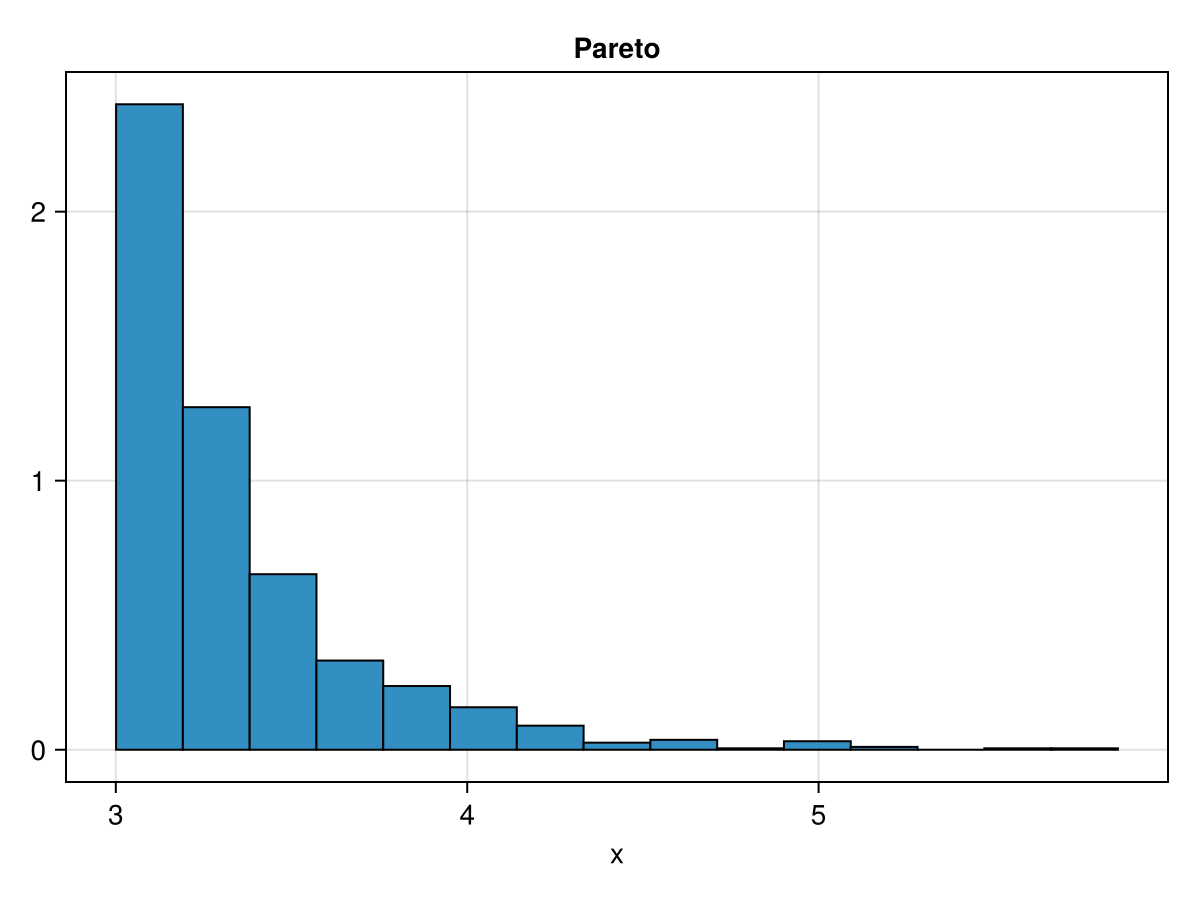

In [21]:
n = 1000
θ = 3
α = 2
u = rand(n)
x = θ ./ (1 .- u).^(1/10)
fig = myhist(x, title = "Pareto")

### Normal

\begin{align*}
  F_{X}(X) & =  U \\
  X & = F_X^{-1}(U) \\
  x_i & = F_X^{-1}(u_i).
\end{align*}

The function `quantile` can be used as the inverse of $F_X^{-1}$.

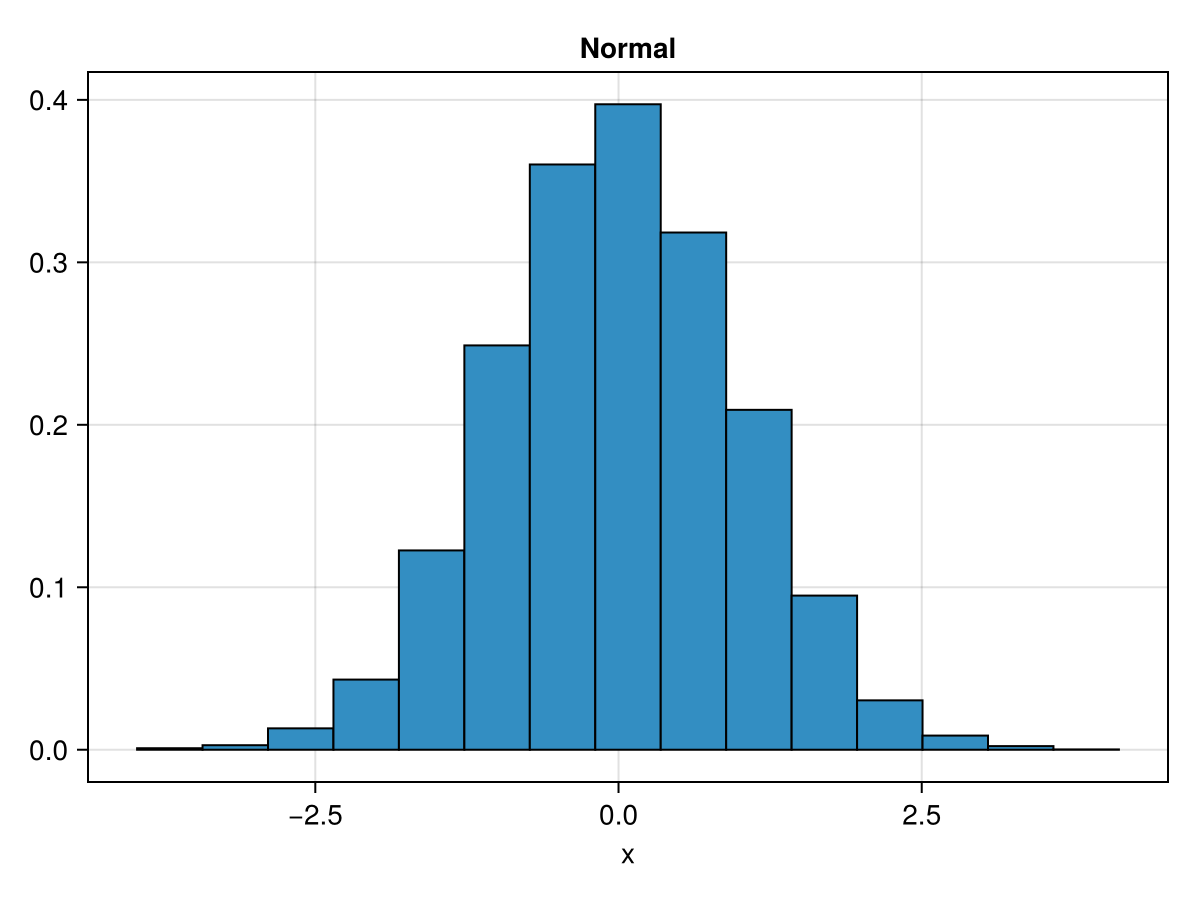

In [22]:
u = rand(10000)
x = quantile(Normal(), u)
fig = myhist(x, title = "Normal")

### Rejection sampling

In this section, we simulate realization for random variables where the density function
is known up to a constant of proportionality $\pi(x) = kJ(x)$.

In [23]:
using CairoMakie

function myhist(x)
    hist(x, strokewidth = 1, normalization = :pdf,
    axis = (xlabel = "x",)
    )
end

myhist (generic function with 1 method)

#### Beta example

\begin{align*}
  f(x) & = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1} ~~\text{for}~~ 0\leq
  x\leq 1 \\
  & \propto x^{\alpha-1}(1-x)^{\beta-1} = J(x).
\end{align*}

In [24]:
α = 2
β = 7
J(x) = x^(α-1) * (1-x)^(β-1)
xmode = (α - 1) / (α + β -2)
M = J(xmode)

0.056652779514852314

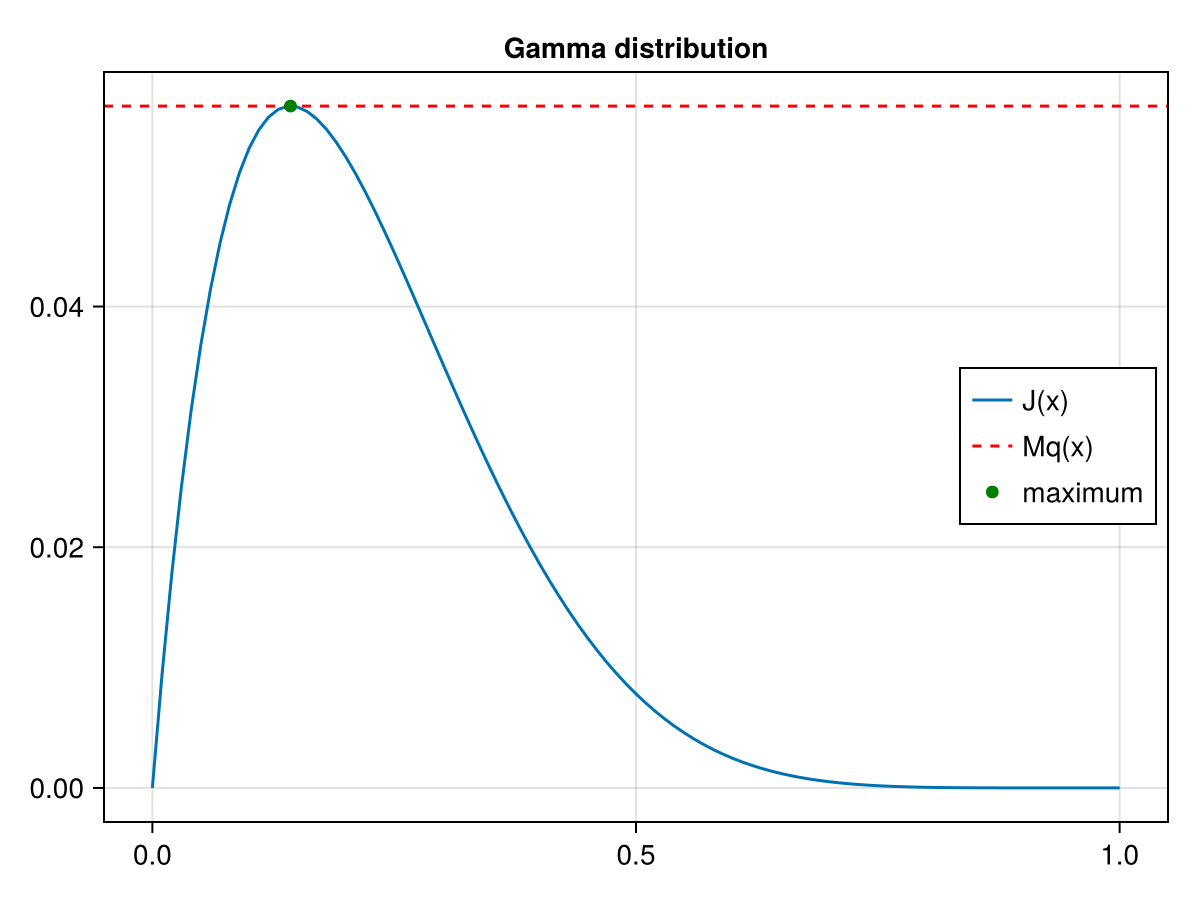

In [25]:
xseq = 0:0.01:1
fig = lines(xseq, J.(xseq), label = "J(x)"; axis = (title = "Gamma distribution",))
hlines!(M, label = "Mq(x)", color = :red, linestyle = :dash)
scatter!([xmode], [J(xmode)], label = "maximum", color = :green)
axislegend(position = :rc)
fig

In [26]:
n = 10000
xsample = zeros(n)
naccepted = 0
while naccepted < n
    local x = rand()
    local r = J(x) / M
    if rand() < r
        global naccepted += 1
        xsample[naccepted] = x
    end
end
xsample

10000-element Vector{Float64}:
 0.251525348536355
 0.3446267335436103
 0.08368263920915331
 0.16474865955731688
 0.1836626037261373
 0.33122332583117453
 0.6367026133890704
 0.2646499769086105
 0.3160367416198724
 0.19463481631712476
 ⋮
 0.08907414108708467
 0.42634965871011055
 0.3171978074544113
 0.25024620247452267
 0.3959773851974998
 0.31488719707521073
 0.05479716608347085
 0.3238632968548808
 0.19107343007456334

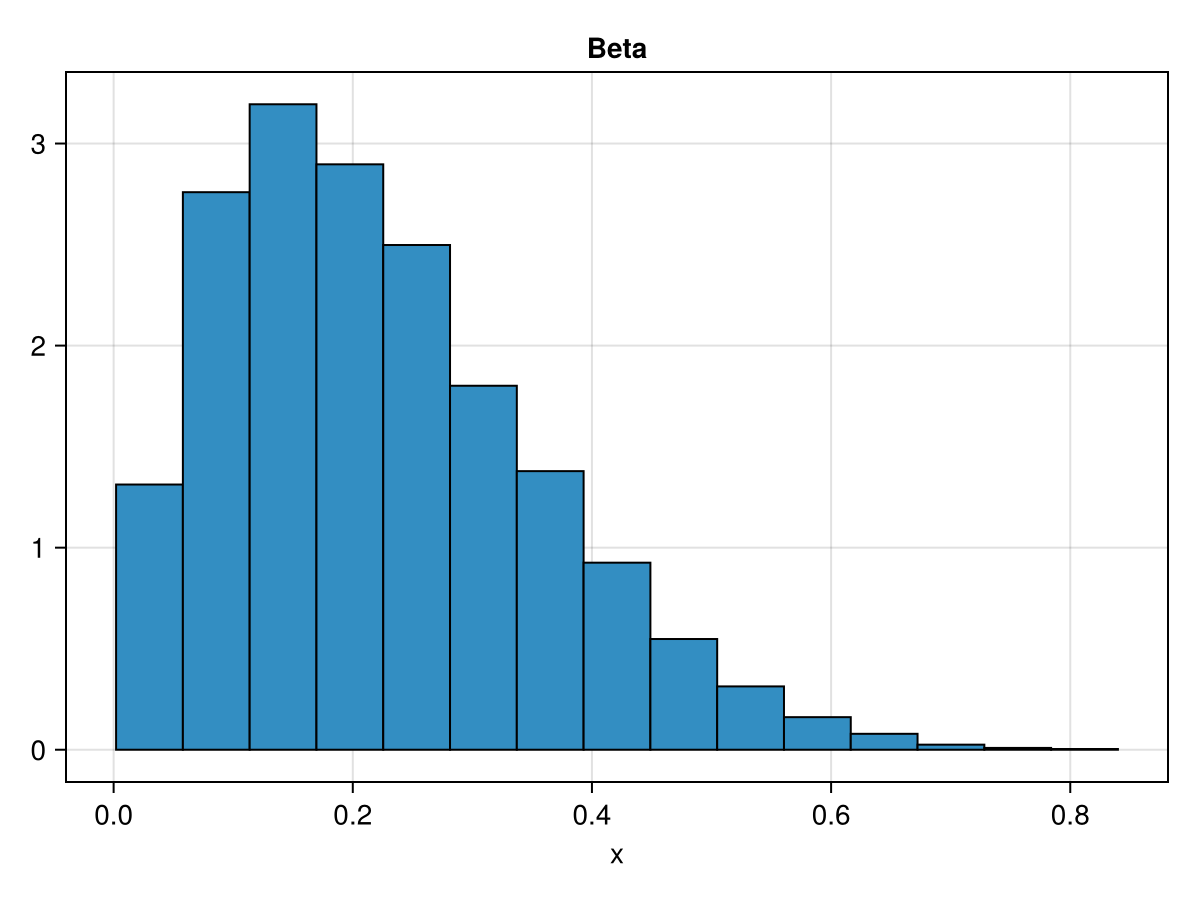

In [27]:
fig = myhist(xsample, title = "Beta")

### Point process example

Let consider the ocurrence of events in a period of time $[0,10]$ with intensity
function $\lambda(t) = sin(t) + 1$. Simulate $200$ events of from this temporal point
process.

In [28]:
λ(t) = sin(t) + 1
M = 2 / (1/10)

20.0

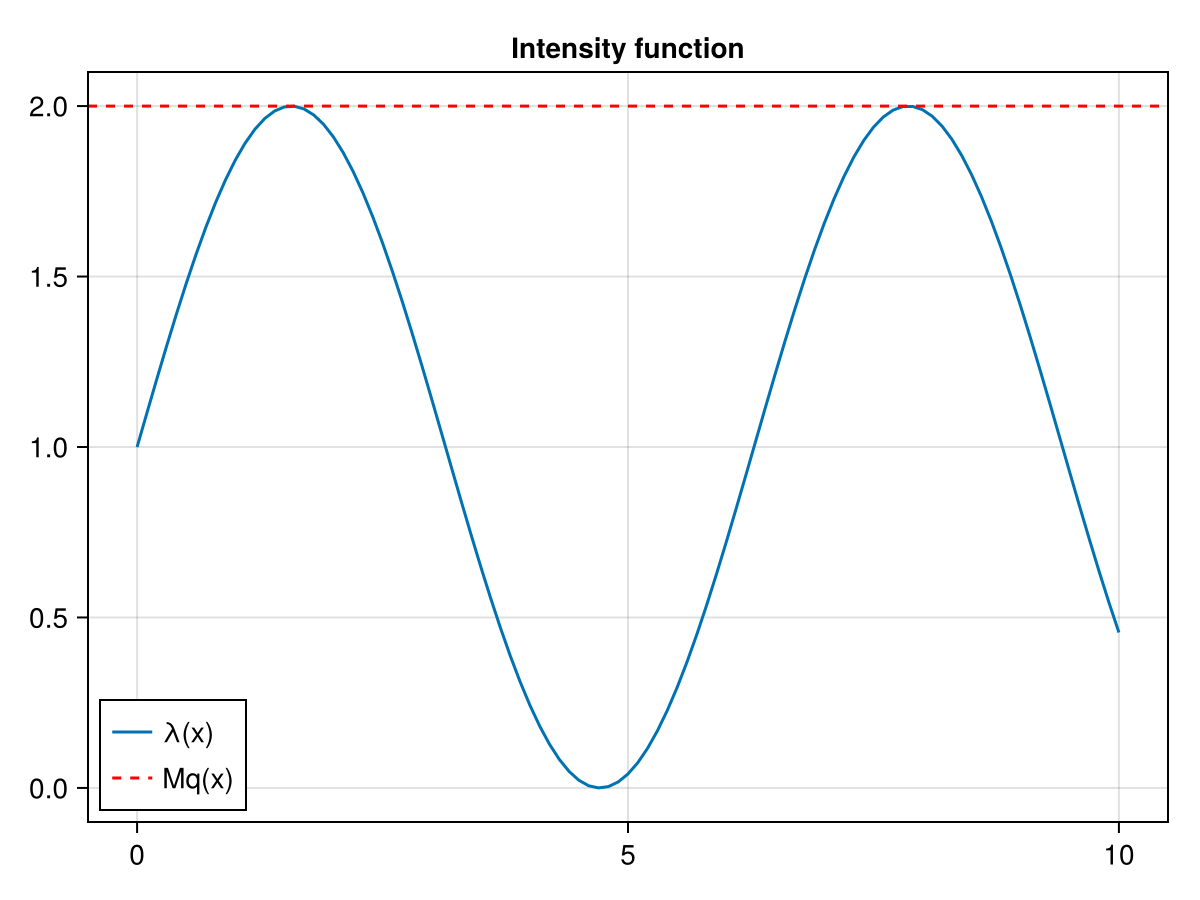

In [29]:
xseq = 0:0.1:10
fig = lines(xseq, λ.(xseq), label = "λ(x)"; axis = (title = "Intensity function",))
hlines!(M * 1/10, label = "Mq(x)", color = :red, linestyle = :dash)
axislegend(position = :lb)
fig

Let sample 200 events from this process

In [30]:
n = 200
xsample = zeros(n)
naccepted = 0
while naccepted < n
    local x = 10 * rand()
    local r = λ(x) / (M * 1/10)
    if rand() < r
        global naccepted += 1
        xsample[naccepted] = x
    end
end
xsample

200-element Vector{Float64}:
 2.576200424246368
 9.968960301141484
 9.017976742345757
 1.4607248927144523
 7.915531957850409
 7.840455324197148
 7.759240545142183
 7.088195054471264
 7.812393977879425
 3.74162275652247
 ⋮
 3.4215811195980637
 9.300472447063749
 8.356036984840937
 7.42546620769228
 1.5997988093439952
 1.2814600546033783
 9.04562891774497
 3.100082196458649
 9.246032905351807

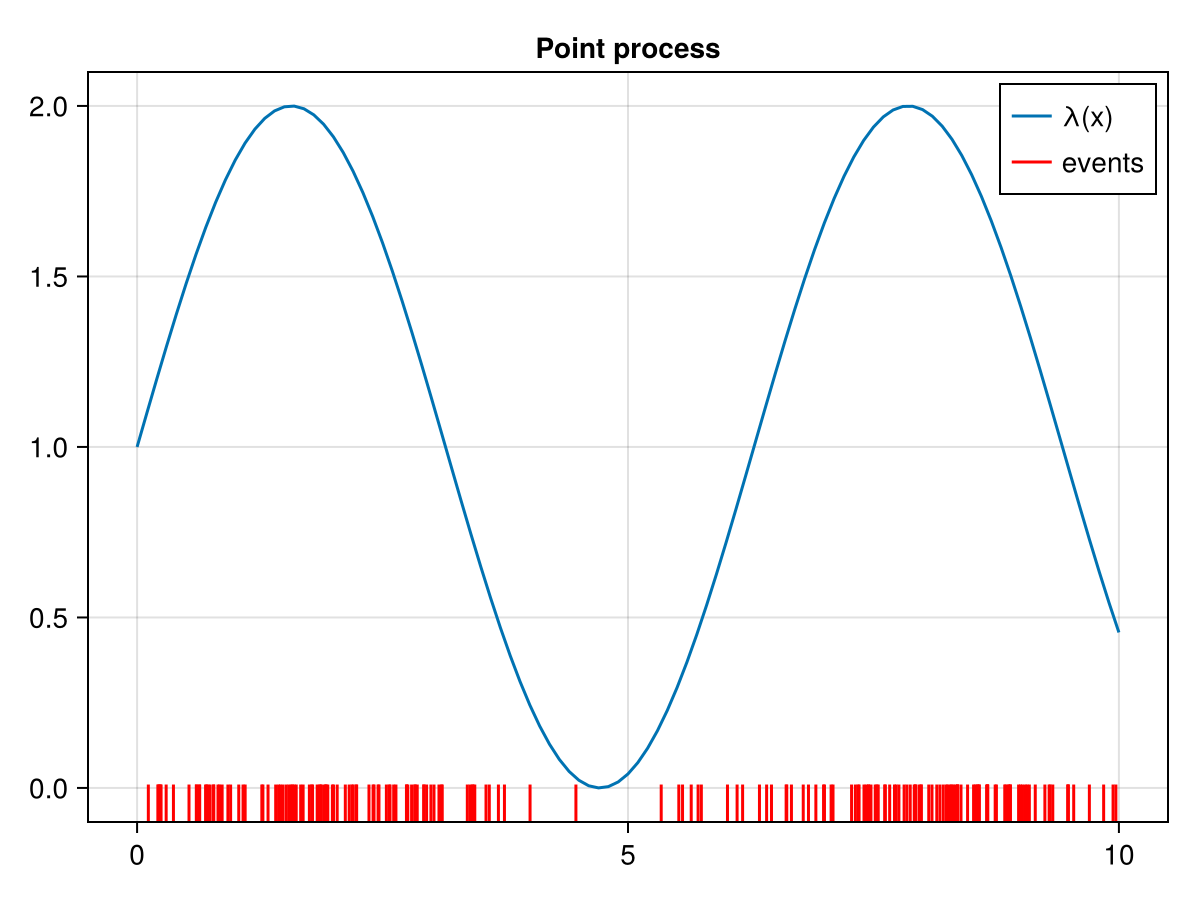

In [31]:
xseq = 0:0.1:10
fig = lines(xseq, λ.(xseq), label = "λ(x)"; axis = (title = "Point process",))
vlines!(xsample, ymax = 0.05, color = :red, label = "events")
axislegend()
fig

## Random variables in Julia

Julia provides an standard way to define random variables using the package
[Distributions.jl](https://juliastats.org/Distributions.jl/stable/).

In [32]:
using Distributions
using CairoMakie
using StatsBase

X = Normal(10, 3)

Distributions.Normal{Float64}(μ=10.0, σ=3.0)

In [33]:
rand(X)

14.328693167672792

In [34]:
rand(X, 3)

3-element Vector{Float64}:
  8.336544463741102
 14.30062162032749
  8.825206632308275

In [35]:
rand(X, (2, 3))

2×3 Matrix{Float64}:
  8.99707  12.4363   9.13216
 13.7584    8.14075  9.13497

In [36]:
rand(X, (2, 3, 4))

2×3×4 Array{Float64, 3}:
[:, :, 1] =
  7.32762  6.36473  8.82069
 13.262    9.47969  6.53191

[:, :, 2] =
 7.696    16.0985   7.81819
 9.22295   8.99952  4.9561

[:, :, 3] =
  9.78504   7.65184  11.8057
 11.1155   11.3454    4.05141

[:, :, 4] =
 12.0555   7.12713  12.0687
 11.8115  10.8564   10.8767

Once we define a random variable, we can easily compute:

- The probability density function (`pdf`)
- The cumulative density function (`cdf`)
- Quantile function (`quantile`)

In [37]:
pdf(X, 10)

0.1329807601338109

In [38]:
cdf(X, 10)

0.5

In [39]:
quantile(X, 0.5)

10.0

In [40]:
mean(X)

10.0

In [41]:
var(X)

9.0

In [42]:
std(X)

3.0

Let's check the density function.

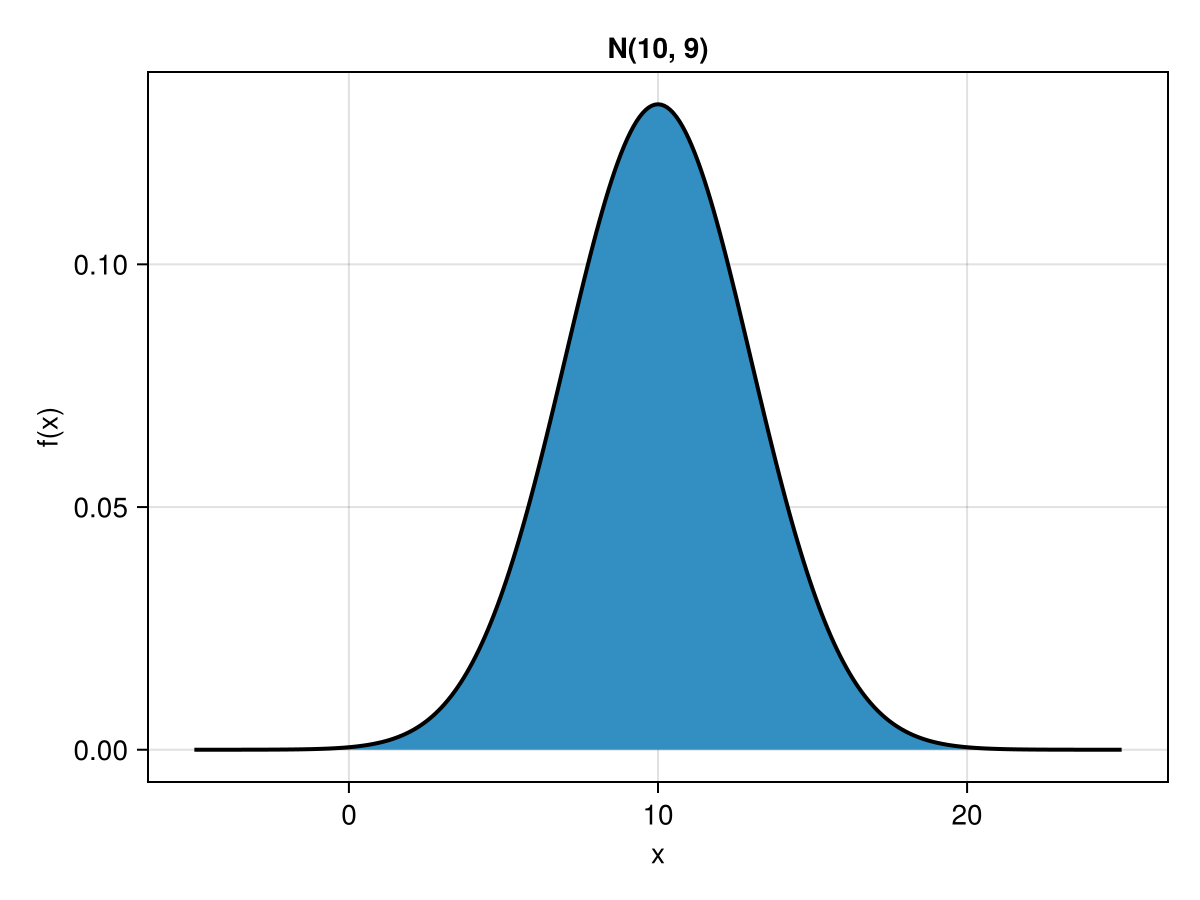

In [43]:
xseq = -5:0.1:25
fig = band(xseq, pdf.(X, xseq), 0,
    axis = (xlabel = "x", ylabel = "f(x)", title = "N(10, 9)")
)
lines!(xseq, pdf.(X, xseq), linewidth = 2, color = :black)
fig

Let's check the cumulative distribution function.

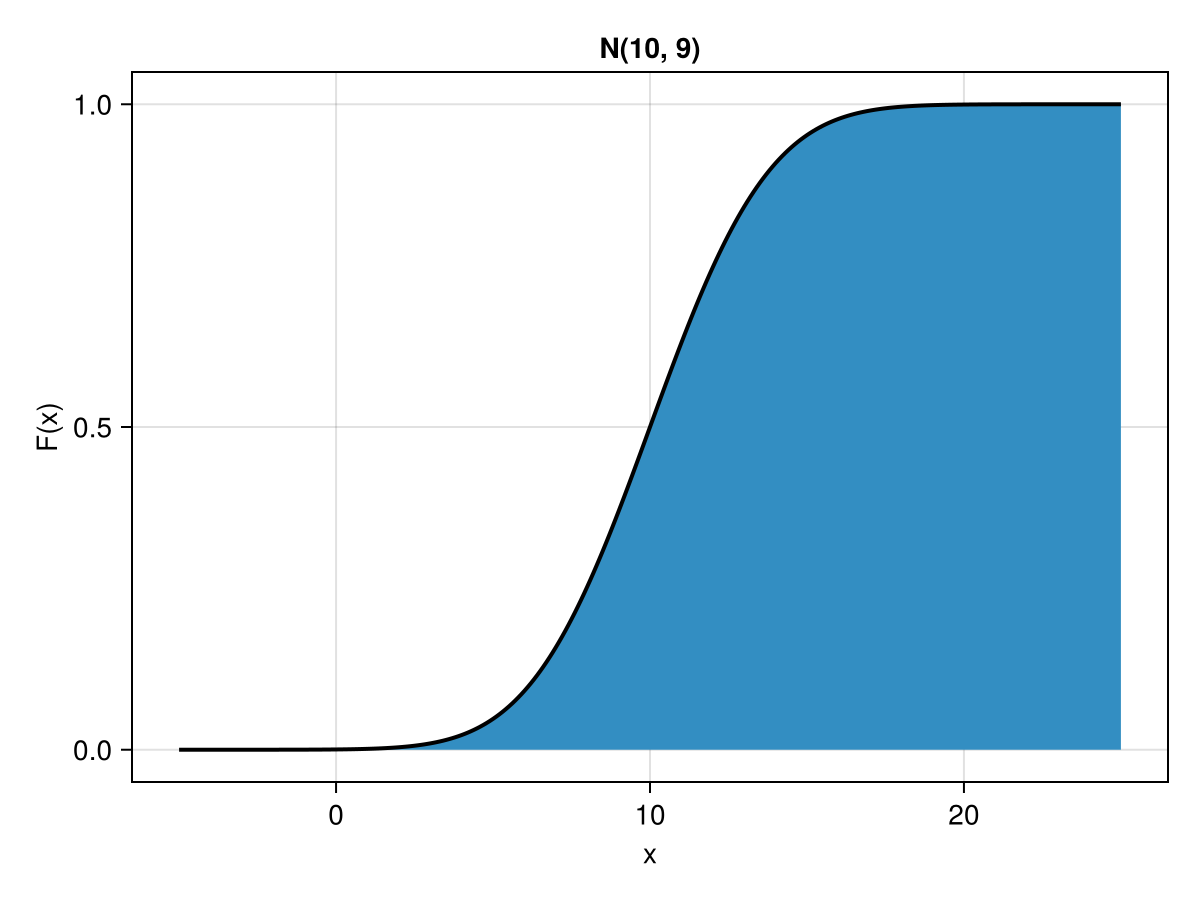

In [44]:
xseq = -5:0.1:25
fig = band(xseq, cdf.(X, xseq), 0,
    axis = (xlabel = "x", ylabel = "F(x)", title = "N(10, 9)")
)
lines!(xseq, cdf.(X, xseq), linewidth = 2, color = :black)
fig

Try with other random variables such as:

- Bernoulli
- Binomial
- Geometric
- Hypergeometric
- Poisson
- Exponential
- Gamma
- Normal
- TDist
- Chisq
- FDist

## Truncated random variables

In [45]:
X = truncated(Normal(2, 3), lower = 0)

Truncated(Distributions.Normal{Float64}(μ=2.0, σ=3.0); lower=0.0)

Let's check the density function.

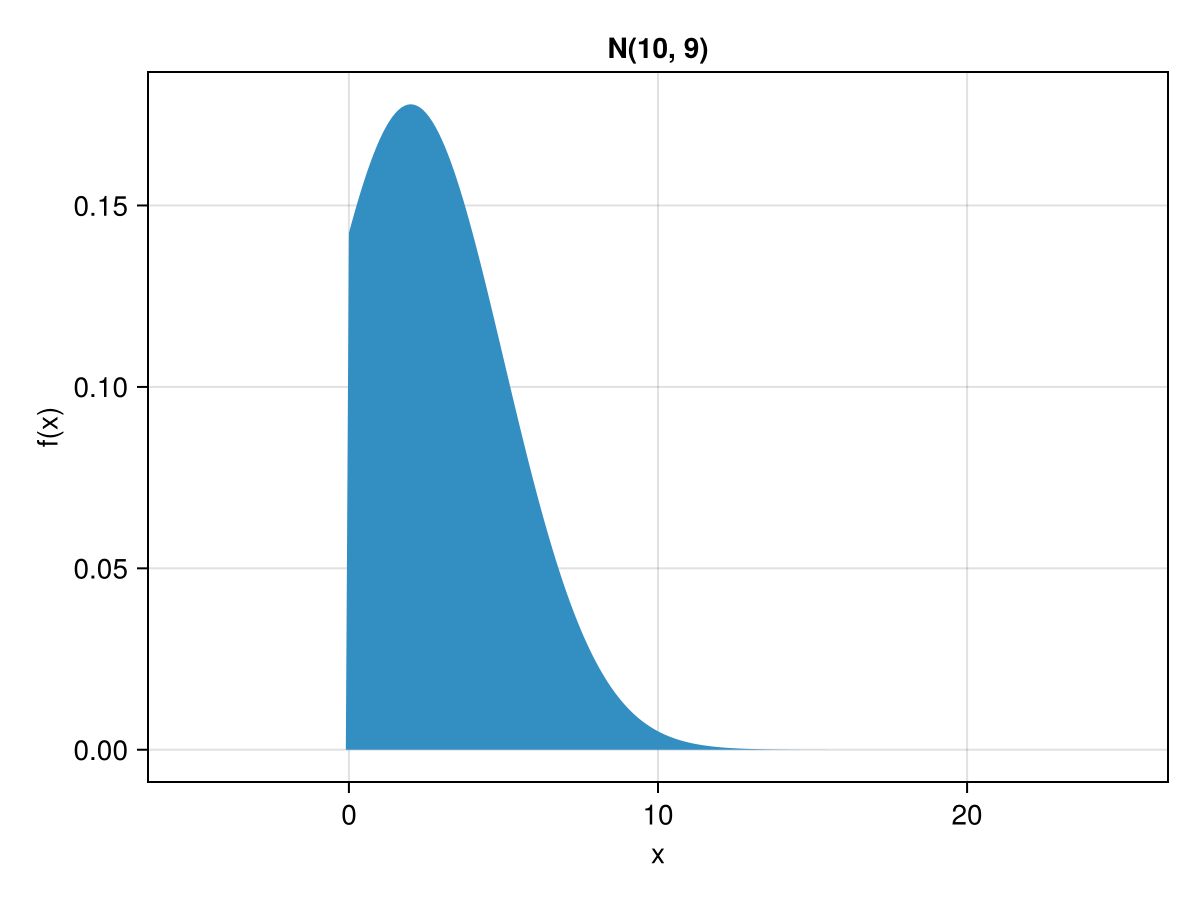

In [46]:
xseq = -5:0.1:25
fig = band(xseq, pdf.(X, xseq), 0,
    axis = (xlabel = "x", ylabel = "f(x)", title = "N(10, 9)")
)
fig

All other methods work

In [47]:
rand(X, 10)

10-element Vector{Float64}:
 2.829893716420635
 2.7096747156691716
 6.974975820954104
 7.019034388407309
 2.4680638768444583
 5.471272847035141
 6.5240938056701046
 0.2739546538999509
 1.014394507334912
 0.08244041532335067

In [48]:
pdf(X, 1)

0.1682851550647819

In [49]:
cdf(X, 1)

0.15645168578123983

## Mixtures

In [50]:
groups = 1:3
probs = [0.3, 0.4, 0.3]
rvs = [Normal(-1,1.5), Normal(3,1), Normal(8,2)]

3-element Vector{Distributions.Normal{Float64}}:
 Distributions.Normal{Float64}(μ=-1.0, σ=1.5)
 Distributions.Normal{Float64}(μ=3.0, σ=1.0)
 Distributions.Normal{Float64}(μ=8.0, σ=2.0)

In [51]:
n = 10000
y = sample(groups, weights(probs), n)
x = rand.(rvs[y])

10000-element Vector{Float64}:
  5.252008680491242
  2.614868605189148
  4.711014765099125
  4.053049259539303
  4.8367655707101385
 -0.6489678403813902
  3.172324463931427
  3.4785975385650363
  6.409128871454108
  0.05896027517702368
  ⋮
  1.0446331070266117
  4.244171773218101
 -1.6255387543426945
  2.9024844251828723
  3.67960804078326
 -2.6753175009268215
 -0.6094741846478962
  4.0608494840145894
  2.1742141412885267

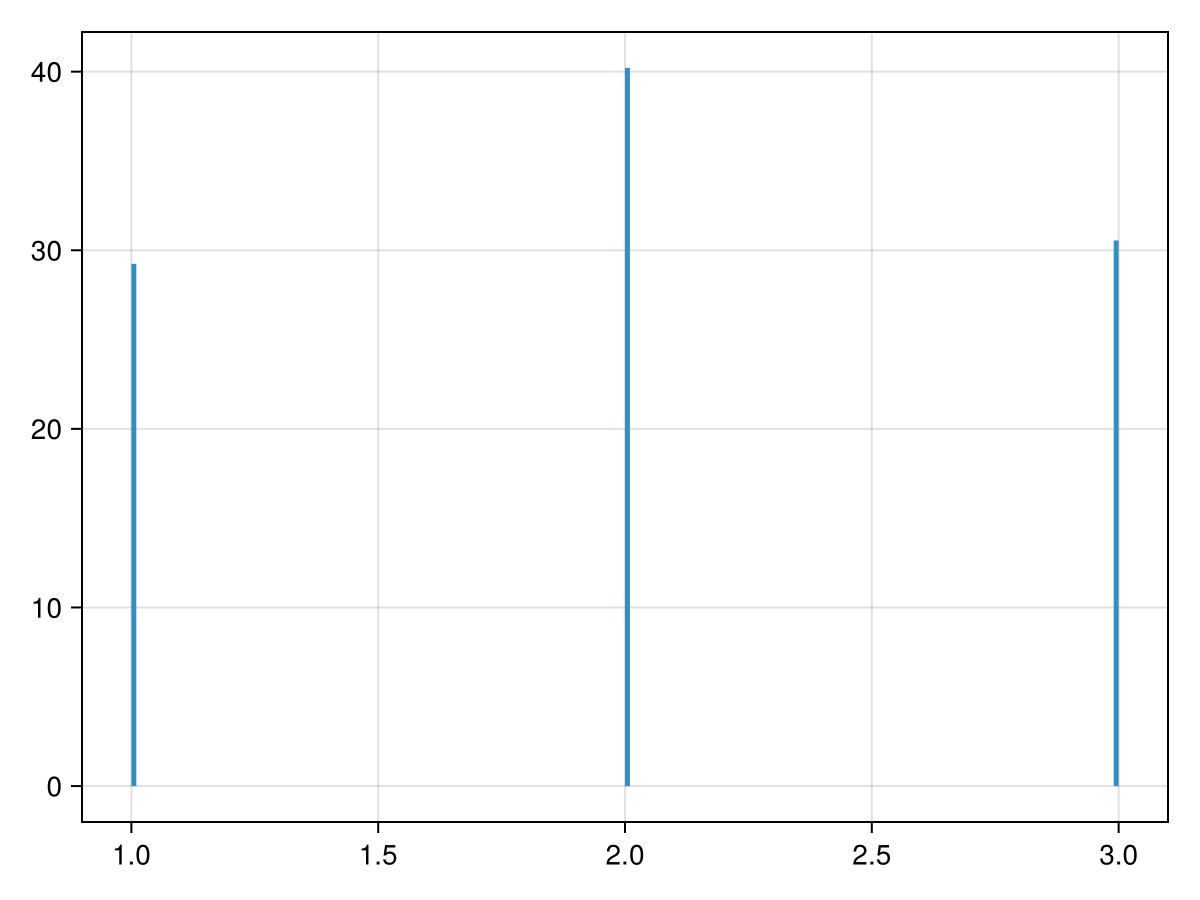

In [52]:
hist(y, bins = 200, normalization = :pdf)

This is also implemented

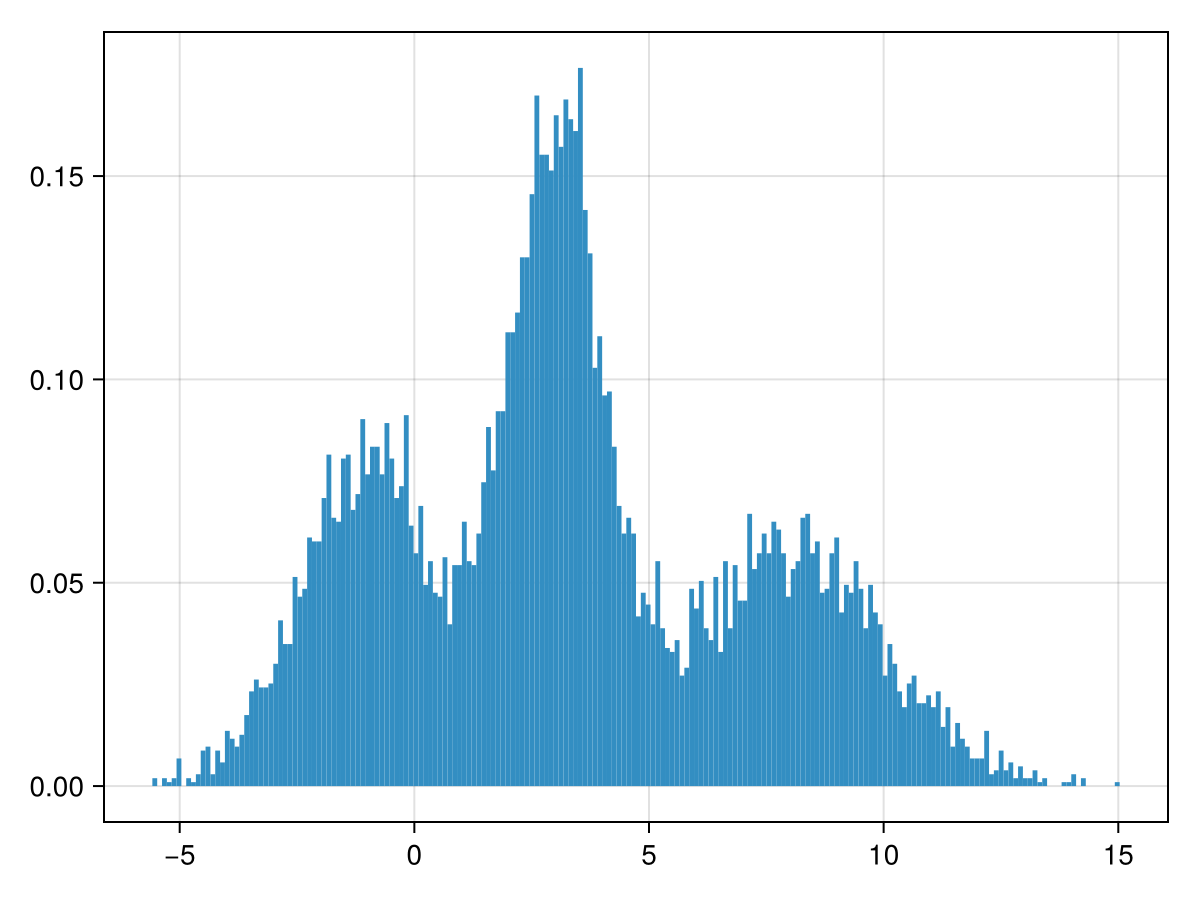

In [53]:
X = MixtureModel(rvs, probs)
hist(rand(X, n), bins = 200, normalization = :pdf)

Continuous case

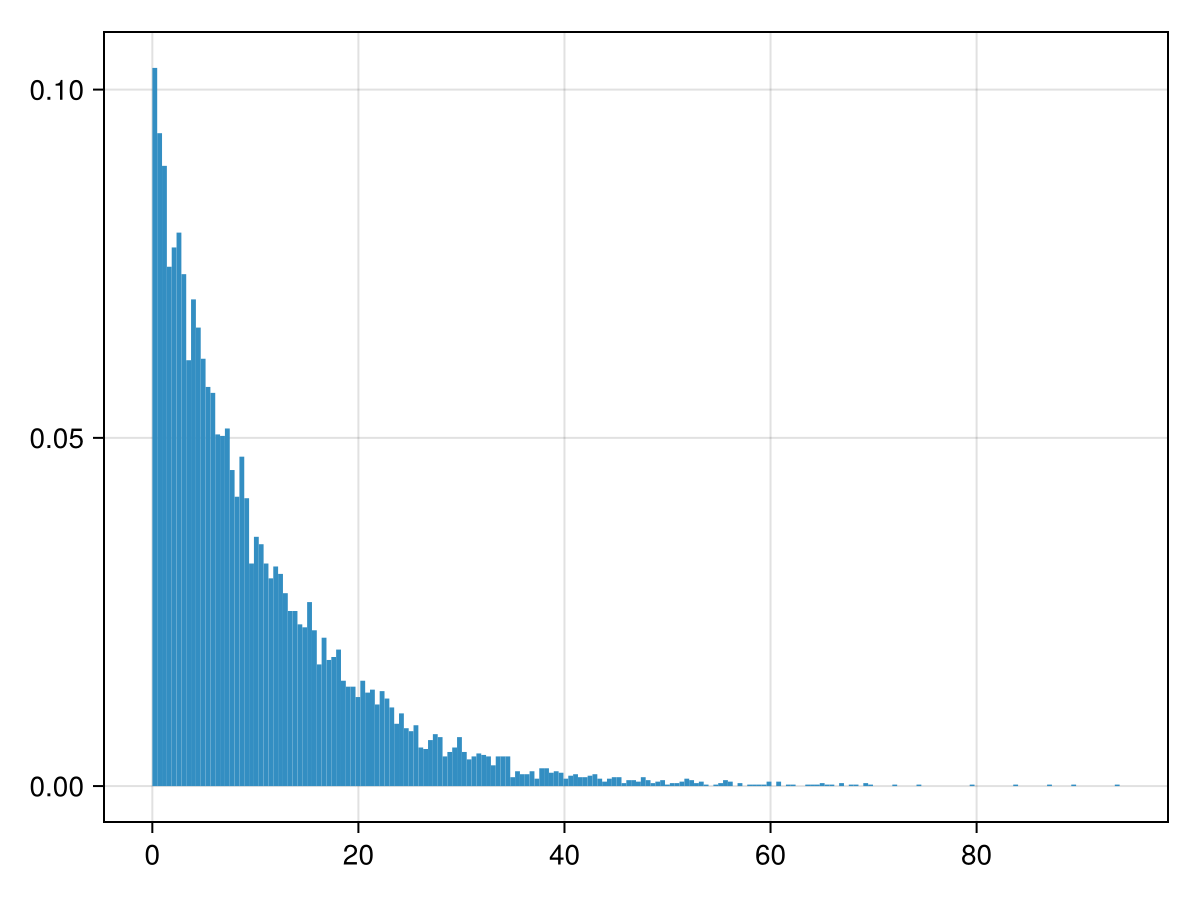

In [54]:
Y = Exponential(10)
y = rand(Y, n)
hist(y, bins = 200, normalization = :pdf)

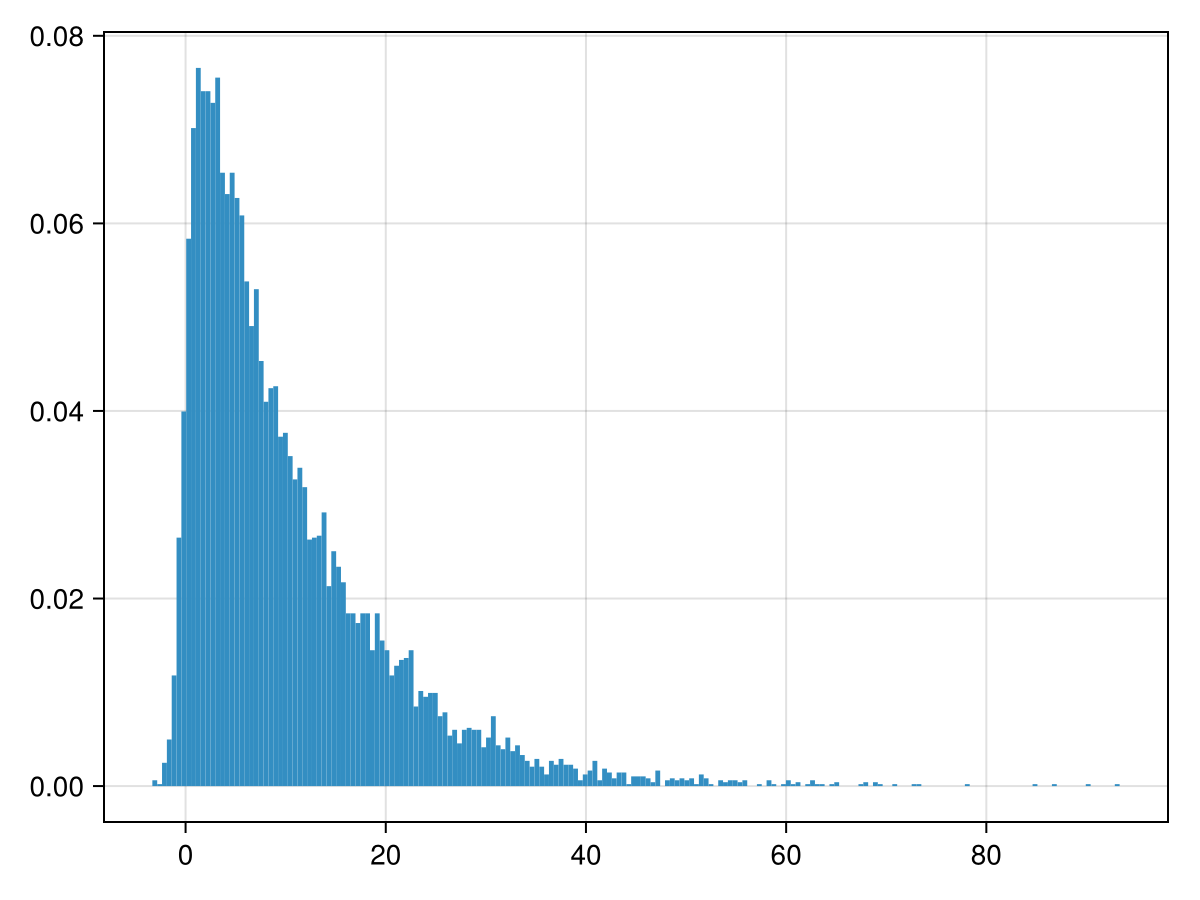

In [55]:
X = Normal.(y)
x = rand.(X)
hist(x, bins = 200, normalization = :pdf)

## Generating random vectors

Sea $\{X(t): t \in \{1,2,\dots,100\}\}$ such as $E(X_t) = 0$, $Cov(X(t),X(t')) =
9\exp(-\frac{|t-t'|}{10})$.

In [56]:
using LinearAlgebra
using Distributions
using CairoMakie

Lets compute the covariance matrix.

In [57]:
n = 200
t = 1:n
Σ = zeros(n, n)
for i = 1:n
    for j = 1:n
        Σ[i, j] = 9 * exp(- abs(t[i]-t[j]) / 10)
    end
end

Now we can easily simulate a normal random vector.

In [58]:
C = cholesky(Σ)
n = length(t)
x = C.L * randn(n)

200-element Vector{Float64}:
 -5.392938060108263
 -3.946711075733316
 -5.8376974657060545
 -5.024184423342999
 -4.944539017401598
 -4.113590063265314
 -1.5791864065024015
 -0.7303855038185857
 -0.6500605124704437
 -1.9596401356261746
  ⋮
 -1.6549545232282985
 -0.556322372359197
  2.485970472653925
  3.2561388017213733
  3.573341762120595
  0.7784093852676464
  0.6145825326133242
 -0.6243033068626742
 -1.0824085557624836

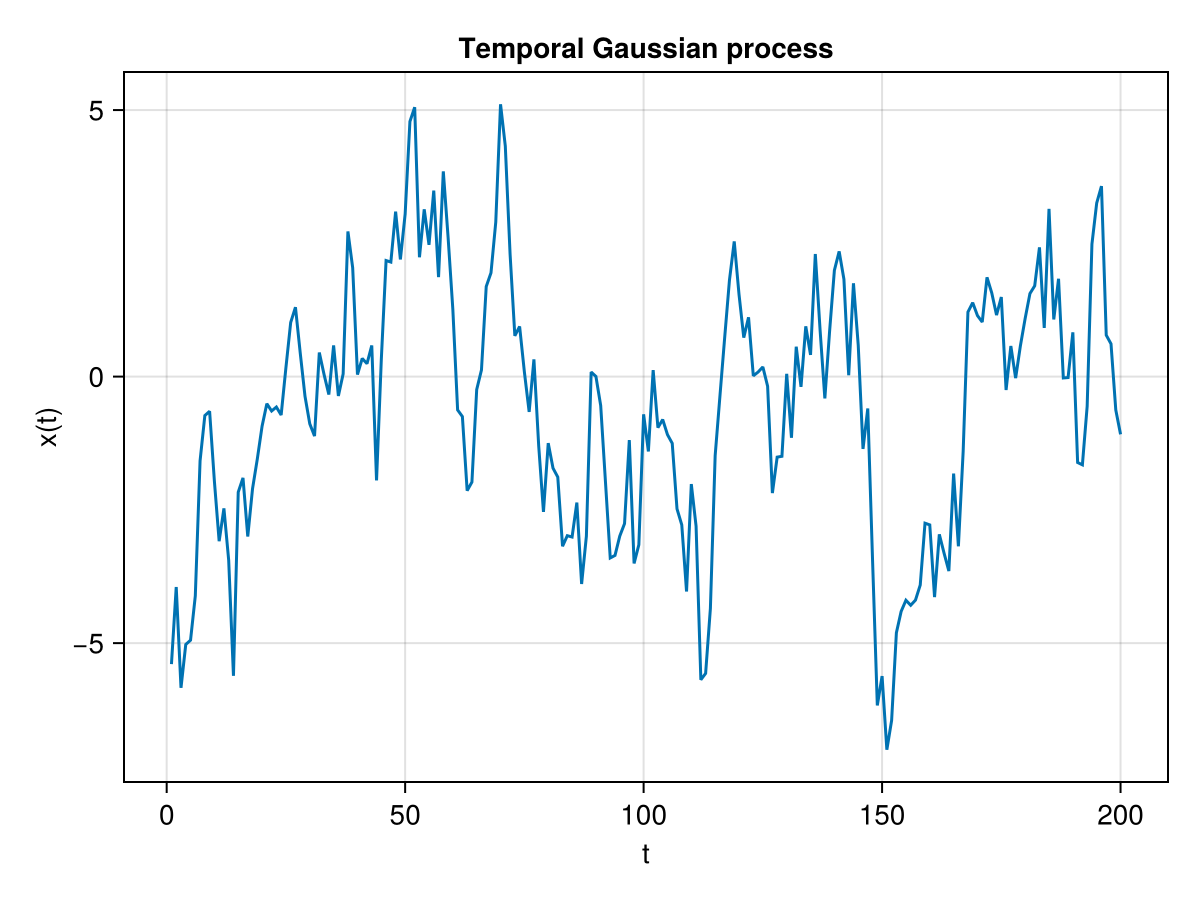

In [59]:
fig = lines(x,
    axis = (xlabel = "t", ylabel = "x(t)", title = "Temporal Gaussian process")
)

We can use also use the `Distributions` package to define the multivarite random vector.

In [60]:
X = MvNormal(Σ)
x = rand(X, 3)

200×3 Matrix{Float64}:
 -4.17151     1.57507    -3.40318
 -5.89989     3.00659    -3.32678
 -4.34609     0.22787    -2.40229
 -3.83179     1.32774    -1.78077
 -3.19926     0.318846   -2.21641
 -4.1554      0.458293   -2.07577
 -5.3717      0.600216   -1.63044
 -2.8313      2.11967    -0.898122
 -3.6616      3.25619    -2.56389
 -2.17407    -0.0139352  -2.15702
  ⋮                      
 -1.46172    -1.02256     0.197361
 -0.840897   -2.36777     0.266344
 -0.335376    0.218914   -0.137423
 -0.0697569  -1.02363    -0.321373
  1.95947    -2.83968     0.144054
  2.04321    -2.8667     -0.179633
  0.325962   -3.11379     1.90888
 -1.66656    -3.30935     1.69349
 -1.19983    -2.43317     3.71584

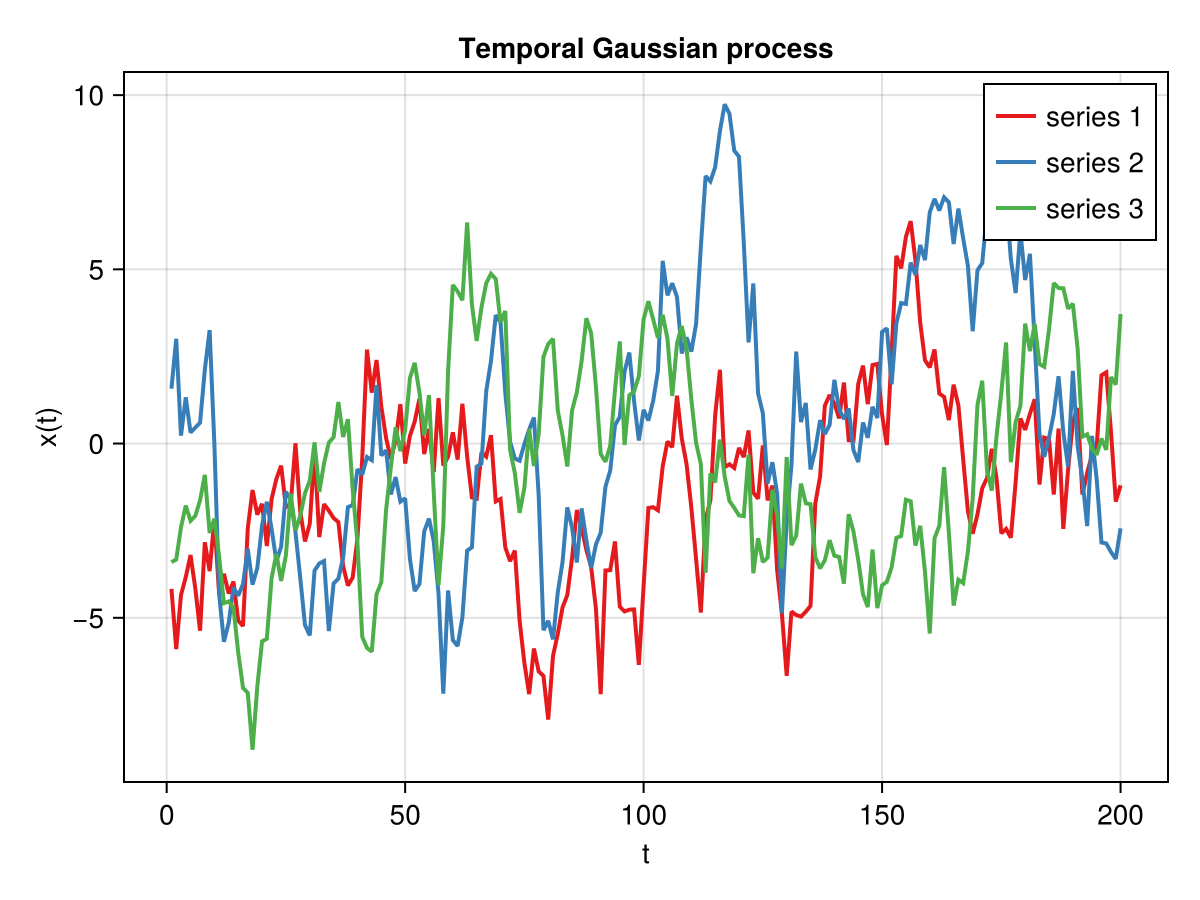

In [61]:
fig = series(t, x', color = :Set1,
    axis = (xlabel = "t", ylabel = "x(t)", title = "Temporal Gaussian process")
)
axislegend()
fig

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*